In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [11]:
def fuzzify_triangular(value: int, center: int,
                       half_width: int, edge: int) -> int:
    if edge == -1 and value < center:
        return 256
    if edge == 1 and value > center:
        return 256
    if value > center + half_width:
        return 0
    if value < center - half_width:
        return 0

    centered_value = int(abs(value - center))
    return int((256 * (half_width - centered_value)) // half_width)


def reading_to_temp(reading: int) -> float:
    voltage = reading * 2 / 1024  # *2 pq usa divisor
    return voltage / 0.01

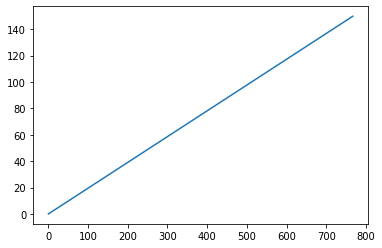

In [20]:
readings = np.array(range(0, round(1024*0.75)))
temps = np.array([reading_to_temp(reading) for reading in readings])

plt.plot(readings, temps)

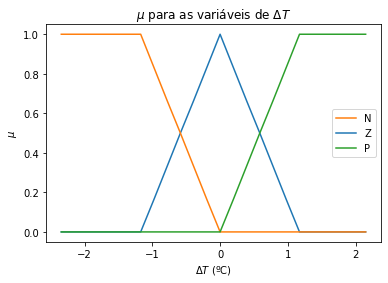

In [64]:
readings = np.array(range(-12, 12))
temps = np.array([reading_to_temp(reading) for reading in readings])

delta_temp_vars = {"Z": (0, 6, 0),
                  "N": (-6, 6, -1),
                  "P": (6, 6, 1)}

plt.title("$\mu$ para as variáveis de $\Delta T$")
plt.xlabel("$\Delta T$ (ºC)")
plt.ylabel("$\mu$")

for var_name, var_info in delta_temp_vars.items():
    plt.plot(temps, 
             np.array([fuzzify_triangular(read, *var_info) for read in readings])/256,
            label=var_name)
    
    
# https://stackoverflow.com/questions/22263807/how-is-order-of-items-in-matplotlib-legend-determined
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("deltaT.svg", facecolor="white")

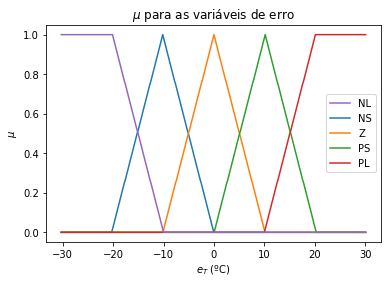

In [65]:
readings = np.array(range(-155, 155))
temps = np.array([reading_to_temp(reading) for reading in readings])

delta_temp_vars = {"NS": (-52, 52, -0),
                  "Z": (0, 52, 0),
                  "PS": (52, 52, 0),
                  "PL": (103, 52, 1),
                  "NL": (-103, 52, -1),}

plt.title("$\mu$ para as variáveis de erro")
plt.xlabel("$e_T$ (ºC)")
plt.ylabel("$\mu$")

for var_name, var_info in delta_temp_vars.items():
    plt.plot(temps, 
             np.array([fuzzify_triangular(read, *var_info) for read in readings])/256,
            label=var_name)
    
    
# https://stackoverflow.com/questions/22263807/how-is-order-of-items-in-matplotlib-legend-determined
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 0, 1, 2, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("erro.svg", facecolor="white")

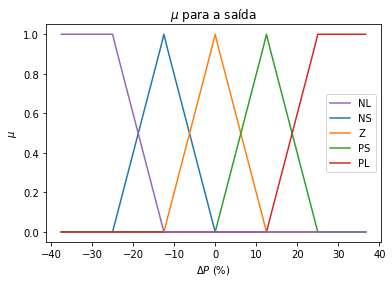

In [71]:
raw_values = np.array(range(-45, 45))
percentages = raw_values/1.2

delta_temp_vars = {"NS": (-15, 15, 0),
                  "Z": (0, 15, 0),
                  "PS": (15, 15, 0),
                  "PL": (30, 15, 1),
                  "NL": (-30, 15, -1),}

plt.title("$\mu$ para a saída")
plt.xlabel("$\Delta P$ (%)")
plt.ylabel("$\mu$")

for var_name, var_info in delta_temp_vars.items():
    plt.plot(percentages, 
             np.array([fuzzify_triangular(raw_value, *var_info) for raw_value in raw_values])/256,
            label=var_name)
    
    
# https://stackoverflow.com/questions/22263807/how-is-order-of-items-in-matplotlib-legend-determined
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 0, 1, 2, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("saida.svg", facecolor="white")